<div style="line-height:0.5">
<h1 style="color:#FF7C00  "> Convolutional Neural Networks in TensorFlow 2 </h1>
<h4> 5 Examples of CNN architectures. </h4>
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3>  
    pathlib.Path + ImageDataGenerator + keras.layers + store and load model with keras + mpimg.imread
</span>
</div> 

In [63]:
import os
import random
import pathlib
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, MaxPooling2D

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-07-07 11:57:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.2MB/s    in 5.8s    

2023-07-07 11:57:31 (18.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [8]:
# Turn the training path into a Python path
data_dir = pathlib.Path("pizza_steak/train/") 

# Create a list of class_names from the subdirectories
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
def view_one_image(target_dir, target_class):
    """ Setup target directory, get a random image path, and read in the image and plot. """
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img

Image shape: (384, 512, 3)


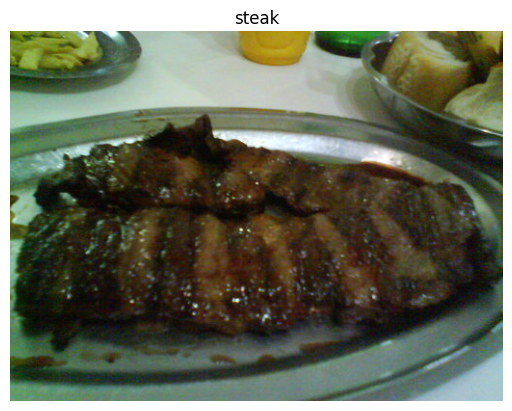

In [10]:
# View a random image from the training dataset
img = view_one_image(target_dir="pizza_steak/train/", target_class="steak")

In [11]:
img[:3]

array([[[ 79, 121,   9],
        [ 85, 124,  15],
        [ 95, 128,  21],
        ...,
        [164, 152, 110],
        [146, 132,  83],
        [129, 114,  59]],

       [[ 86, 117,   0],
        [ 89, 118,   0],
        [ 97, 121,   9],
        ...,
        [168, 156,  84],
        [149, 137,  53],
        [131, 115,  27]],

       [[ 97, 110,   0],
        [ 97, 110,   0],
        [100, 112,   2],
        ...,
        [165, 155,  66],
        [145, 133,  35],
        [122, 109,   5]]], dtype=uint8)

In [12]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(384, 512, 3)


In [13]:
## Get all pixel values between 0 & 1
img/255

array([[[0.30980392, 0.4745098 , 0.03529412],
        [0.33333333, 0.48627451, 0.05882353],
        [0.37254902, 0.50196078, 0.08235294],
        ...,
        [0.64313725, 0.59607843, 0.43137255],
        [0.57254902, 0.51764706, 0.3254902 ],
        [0.50588235, 0.44705882, 0.23137255]],

       [[0.3372549 , 0.45882353, 0.        ],
        [0.34901961, 0.4627451 , 0.        ],
        [0.38039216, 0.4745098 , 0.03529412],
        ...,
        [0.65882353, 0.61176471, 0.32941176],
        [0.58431373, 0.5372549 , 0.20784314],
        [0.51372549, 0.45098039, 0.10588235]],

       [[0.38039216, 0.43137255, 0.        ],
        [0.38039216, 0.43137255, 0.        ],
        [0.39215686, 0.43921569, 0.00784314],
        ...,
        [0.64705882, 0.60784314, 0.25882353],
        [0.56862745, 0.52156863, 0.1372549 ],
        [0.47843137, 0.42745098, 0.01960784]],

       ...,

       [[0.38431373, 0.60392157, 0.50588235],
        [0.38039216, 0.60784314, 0.50980392],
        [0.36862745, 0

<div style="line-height:0.5">
<h2 style="color:#FF7C00  "> Typical CNN architecture </h2>
<div style="line-height:1.3">

+ Input image(s)	      ==> Target images you'd like to discover patterns in
+ Input layer	          ==> Takes in target images and preprocesses them for further layers
+ Convolution layer	    ==> Extracts/learns the most important features from target images
+ Hidden activation	    ==> Adds non-linearity to learned features, usually ReLU (tf.keras.activations.relu)
+ Pooling layer	        ==> Reduces the dimensionality of learned image features, Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)
+ Fully connected layer	==> Further refines learned features from convolution layers	tf.keras.layers.Dense
+ Output layer	        ==> Takes learned features and outputs them in shape of target labels	output_shape
+ Output activation	    ==> Adds non-linearities to output layer	tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax
</div>
</div>

<h3 style="color:#FF7C00  "> <u> Example #1: Classification  </u> </h3>

In [ ]:
tf.random.set_seed(90)

## Normalization
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
## Setup
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

## Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                            batch_size=32,             #num images to process at time
                                            target_size=(224, 224),    #convert all images to be 224 x 224
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            seed=42)

<h4 style="color:#FF7C00  "> Model CNN 1 </h4>

In [14]:
model_cnn1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                        kernel_size=3,
                        activation="relu",
                        input_shape=(224, 224, 3)),         #first layer specifies input shape (height, width, colour channels)
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,                  #pool_size can also be (2, 2)
                        padding="valid"),                   #padding can also be 'same'
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),       #activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")          #binary activation output
])

### Compile
model_cnn1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

##### Train
model1_fitted = model_cnn1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 30s 336ms/step - loss: 0.6415 - accuracy: 0.6467 - val_loss: 0.4472 - val_accuracy: 0.8020
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.4561 - accuracy: 0.7853 - val_loss: 0.4610 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 13s 277ms/step - loss: 0.4252 - accuracy: 0.8047 - val_loss: 0.3513 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 12s 264ms/step - loss: 0.3887 - accuracy: 0.8240 - val_loss: 0.3923 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 13s 271ms/step - loss: 0.3528 - accuracy: 0.8507 - val_loss: 0.3180 - val_accuracy: 0.8560


In [15]:
model_cnn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

<h4 style="color:#FF7C00  "> Model CNN 2 </h4>

In [16]:
tf.random.set_seed(90)
model_cnn2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),      #dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
## Compile
model_cnn2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
## Fit
model2_fitted = model_cnn2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 322ms/step - loss: 0.8867 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 11s 220ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 218ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 272ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [17]:
model_cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


<h4 style="color:#FF7C00  "> Model CNN 3 </h4>

In [18]:
tf.random.set_seed(90)
model_cnn3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),     #dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(100, activation='relu'),          #increase number of neurons from 4 to 100 (for each layer)
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),          #add an extra layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])
## Compile
model_cnn3.compile(loss='binary_crossentropy',
            optimizer=tf.keras.optimizers.Adam(),
            metrics=["accuracy"])

## Fit
model3_fitted = model_cnn3.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 281ms/step - loss: 2.4077 - accuracy: 0.6253 - val_loss: 0.7015 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 13s 281ms/step - loss: 0.6108 - accuracy: 0.7320 - val_loss: 0.6354 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5861 - accuracy: 0.7493 - val_loss: 0.4346 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 13s 275ms/step - loss: 0.5523 - accuracy: 0.7733 - val_loss: 0.5358 - val_accuracy: 0.7140
Epoch 5/5
47/47 [==============================] - 17s 362ms/step - loss: 0.4366 - accuracy: 0.8093 - val_loss: 0.4113 - val_accuracy: 0.8040


In [19]:
model_cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


<h3 style="color:#FF7C00  "> <u> Example #2: Binary classification  </u> </h3>

In [24]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='binary',
                                            batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


47
16
Epoch 1/5
47/47 [==============================] - 13s 248ms/step - loss: 1.0963 - accuracy: 0.6473 - val_loss: 0.4449 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 0.4901 - accuracy: 0.7740 - val_loss: 0.4577 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 11s 237ms/step - loss: 0.4276 - accuracy: 0.8153 - val_loss: 0.4021 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 13s 279ms/step - loss: 0.3379 - accuracy: 0.8653 - val_loss: 0.4178 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 12s 264ms/step - loss: 0.1966 - accuracy: 0.9367 - val_loss: 0.4997 - val_accuracy: 0.8120


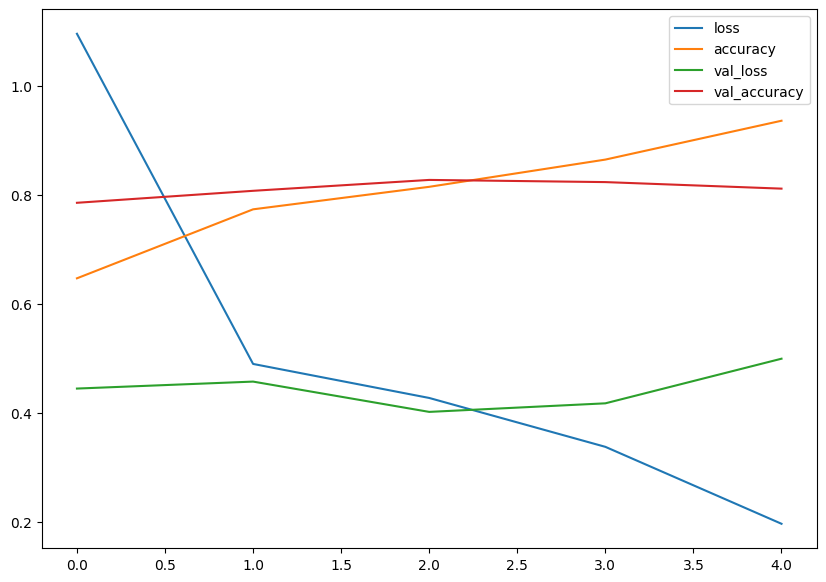

In [27]:
model_4 = Sequential([Conv2D(
            filters=10,
            kernel_size=3,
            strides=1,
            padding='valid',
            activation='relu',
            input_shape=(224, 224, 3)),       #input layer, specifying the input shape
        Conv2D(10, 3, activation='relu'),
        Conv2D(10, 3, activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')        #output layer, specifying the output shape
])

print(len(train_data))
print(len(test_data))

### Compile
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
###### Fit
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

# Plot
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [28]:
""" 
N.B.
Our model is overfitting the training dataset!  Let's separate the accuracy and loss curves... """

def plot_loss_curves(history):
  """ Visualize separate loss curves for validation and training data separately. """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  ##### Display loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  ###### Display accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


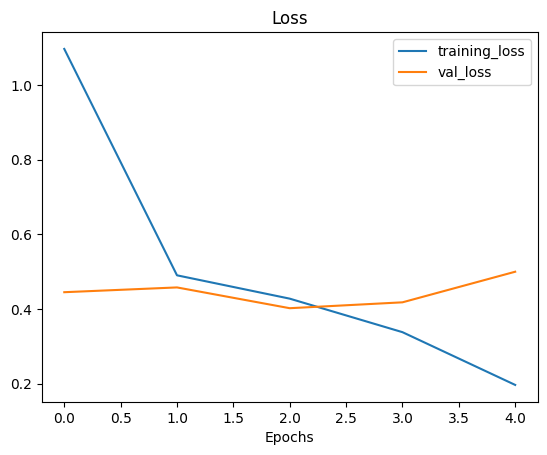

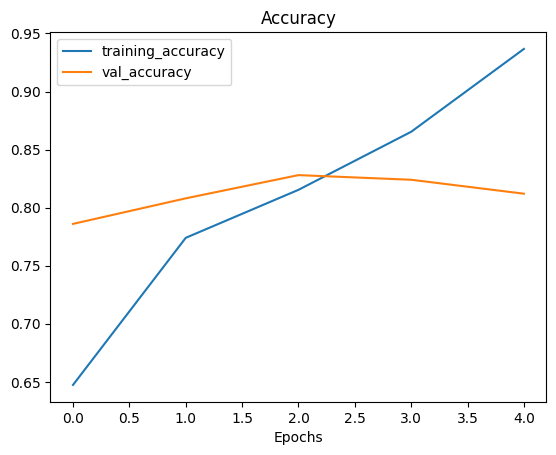

In [29]:
plot_loss_curves(history_4)

In [30]:
model_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_18 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_7 (Flatten)         (None, 475240)            0         
                                                                 
 dense_12 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


<div style="line-height:0.5">
<h4 style="color:#FF7C00  "> Adjustments </h4>
Tune model parameters to reduce overfitting! <br>
<div style="line-height:1.5">
</div>
<div style="line-height:1.5">

- Increase the number of convolutional layers <br>
- Increase the number of convolutional filters <br>
- Add another dense layer to the output of our flattened layer <br>
</div>

In [31]:
""" Convolutional Neural Network with 3 layer.
N.B.
The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image.
However, the model might not be able to learn anything.
"""

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2), # reduce number of features by half
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])
## Compile
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])
## Fit
history_5 = model_5.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 245ms/step - loss: 0.6348 - accuracy: 0.6427 - val_loss: 0.5134 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 12s 249ms/step - loss: 0.4817 - accuracy: 0.7773 - val_loss: 0.3983 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 18s 377ms/step - loss: 0.4264 - accuracy: 0.8040 - val_loss: 0.3627 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 14s 310ms/step - loss: 0.3971 - accuracy: 0.8227 - val_loss: 0.3329 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 15s 317ms/step - loss: 0.3887 - accuracy: 0.8293 - val_loss: 0.4184 - val_accuracy: 0.8040


In [32]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

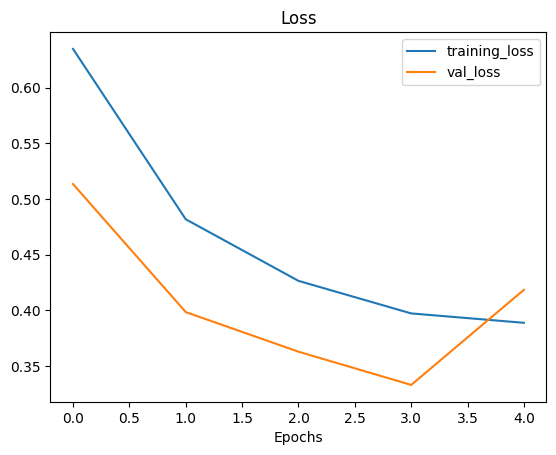

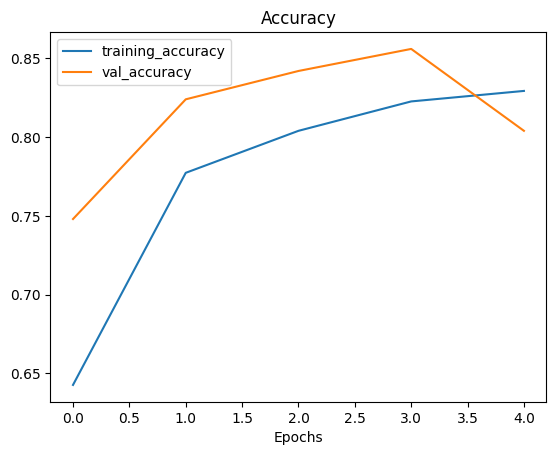

In [33]:
plot_loss_curves(history_5)

<div style="line-height:0.48">
<h2 style="color:#FF7C00  "> Data augmentation </h2>
</div>
Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. <br>
If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.  

Altering training data, leads to having more diversity, and allows the models to learn more generalizable patterns.   
E.g = adjusting the rotation of an image, flipping it, cropping it or something similar.

In [42]:
""" Rescale the data and create data generator instances, then load data from proper directories and turn it into batches"""
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

test_data = train_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [49]:
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 500 images belonging to 2 classes.


In [51]:
""" Create augmented data generator instance """
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=20,          #note: int not a float!
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 1500 images belonging to 2 classes.


<h3 style="color:#FF7C00  "> <u> Example #3 </u> </h3>

In [65]:
# Load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#### Preprocess data and split
x_train = np.expand_dims(x_train, -1) / 255.0
x_test = np.expand_dims(x_test, -1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

11490434/11490434 [==============================] - 2s 0us/step


In [66]:
""" MaxPooling2D => TensorFlow 2.0 and later versions.
N.B.
MaxPool2D is an alias for MaxPooling2D that is maintained for backward compatibility 
"""

######## model architecture definition
model = tf.keras.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

### Compile 
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
# Train 
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.1746 - accuracy: 0.9474 - val_loss: 0.0585 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0466 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0409 - accuracy: 0.9873 - val_loss: 0.0363 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0320 - val_accuracy: 0.9894
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0412 - val_accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0200 - accuracy: 0.9937 - val_loss: 0.0289 - val_accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0165 - accuracy: 0.9945 - val_loss: 0.0326 - val_accur

In [69]:
## Predict new data
new_data = np.random.rand(10, 28, 28, 1)
predictions = model.predict(new_data)

1/1 [==============================] - 0s 124ms/step


<h2 style="color:#FF7C00  "> Saving and loading models </h2>

In [70]:
## Store a model
model.save("saved_trained_model")

In [75]:
## Load a model
loaded_model = tf.keras.models.load_model("saved_trained_model")